# Exemplo 2: Acessando a API de pesquisas agregadas do IBGE

A API de pesquisas agregadas do IBGE fornece acesso aos dados compilados de diversas pesquisas.

Com isso, é possível consultar um grande universo de dados a partir dos mesmos métodos (endpoints).

## Primeiros passos

1. Importar bibliotecas e inicializar variáveis
2. Definir como os dataframes serão exibidos

In [1]:
# importando a biblioteca:
import inteligencia_popular as ip

# vamos importar o Pandas para poder alterar as opções de exibição das tabelas
import pandas as pd

# o objeto 'ibge' nos dará acesso a todas as APIs do IBGE e também aos identificadores
ibge = ip.fontes.ibge

# FILTRO DE MUNICÍPIOS
# vamos também criar uma variável com o filtro de municípios
# conforme o que encontramos no Exemplo 1
localidades = 'N6[2901304,2904001,2913002,2915007,2919306,2920809,2921906,2922854,2923035,2923506,2924306,2929909,2932804,2933406]'


In [2]:
# definindo exibição das tabelas para não truncar o texto
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', 80)

## Buscando pesquisas agregadas

In [3]:
"""
Inicialmente, vamos dar uma olhada nas pesquisas disponíveis.
Escolhida a pesquisa, vamos olhar para seus agregados e escolher um também.
"""

# pesquisas agregadas disponíveis para nível município
nivel = ibge.identificador('nivel_geografico', 'municipio')
agregados = ibge.agregados.disponiveis(nivel = nivel)

# primeiro, vamos exibir as pesquisas que possuem
# resultados agregados
print(
    agregados[['pesquisa-id', 'pesquisa-nome']].drop_duplicates()
)

     pesquisa-id                                                         pesquisa-nome
0             D5                                                     Áreas Urbanizadas
1             CL                                          Cadastro Central de Empresas
28            CA                                                    Censo Agropecuário
1435          ME                              Censo Comum do Mercosul, Bolívia e Chile
1461          CD                                                     Censo Demográfico
2461          CM                                                Contagem da População 
2482          DU         Contas de ecossistemas: o uso da terra nos biomas brasileiros
2484          DT                                         Contas de Espécies Ameaçadas 
2486          C4                                  Contas Econômicas Ambientais da Água
2500          DR           Contas Econômicas Ambientais da Terra: Contabilidade Física
2501          DZ         Contas Econômicas 

In [4]:
# vamos ver quais dados podemos acessar da pesquisa 'Censo Demográfico'
pesquisa = 'CD'

print(
    agregados[agregados["pesquisa-id"] == pesquisa][["agregado-id", "agregado-nome"]]
)

     agregado-id                                                                    agregado-nome
1461         102  Mulheres de 10 anos ou mais de idade, que viviam em união conjugal, total e ...
1462         103  Mulheres de 10 anos ou mais de idade, que viviam em união conjugal e tiveram...
1463         105  Filhos tidos nascidos vivos das mulheres de 10 anos ou mais de idade, que vi...
1464         107  Mulheres de 10 anos ou mais de idade, que tiveram filhos nascidos vivos, por...
1465         108  Mulheres de 10 anos ou mais de idade, residentes em domicílios particulares,...
1466        1134  Domicílios particulares permanentes, por situação do domicílio, espécie de u...
1467        1161  Domicílios particulares permanentes, por situação do domicílio e a espécie d...
1468        1206  Pessoas de 10 anos ou mais de idade, por estado conjugal e estado civil, seg...
1469        1209                                                   População, por grupos de idade
1470        1211  Do

In [5]:
"""
Vamos dar uma olhada nos dados da pesquisa:
'População residente, por sexo, situação e localização da área'.
Para isso, precisamos conhecê-la um pouco melhor.
Podemos fazer isso por meio de seus metadados.
"""
agregado = 1309

print('-' * 100)
print('Metadados')
print('-' * 100)
print(ibge.agregados.metadados(agregado = agregado))

print('-' * 100)
print('Níveis Territoriais')
print('-' * 100)
print(ibge.agregados.nivelTerritorial(agregado = agregado))

print('-' * 100)
print('Variáveis')
print('-' * 100)
print(ibge.agregados.variaveis(agregado = agregado))

print('-' * 100)
print('Classificações')
print('-' * 100)
print(ibge.agregados.classificacoes(agregado = agregado))

----------------------------------------------------------------------------------------------------
Metadados
----------------------------------------------------------------------------------------------------
          col                                                            val
0          id                                                           1309
1        nome  População residente, por sexo, situação e localização da área
2       sidra                          https://sidra.ibge.gov.br/tabela/1309
3    pesquisa                                              Censo Demográfico
4     assunto                                                        Pessoas
5  frequencia                                                          anual
6      inicio                                                           2000
7         fim                                                           2010
-----------------------------------------------------------------------------------------------

In [6]:
"""
Proposta: situação e localização de residências

Vamos pegar os dados de 'Situação e localização da área'
e exibí-los em um gráfico de pizza para buscar compreender
os níveis de urbanização da região escolhida.
"""

# vamos definir como período o ano de 2010
periodos = '2010'

# queremos ver o total de população residente
variaveis = '93'

# para definir a classificação escolhida, precisamos especificar
# que queremos todas as categorias
classificacao = '11277[all]'

resultados = ibge.agregados.resultados(
    agregado = agregado,
    periodos = periodos,
    variaveis = variaveis,
    localidades = localidades,
    classificacao = classificacao,
)

print(resultados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   nivel-territorial-id               252 non-null    object
 1   nivel-territorial                  252 non-null    object
 2   unidade-de-medida-id               252 non-null    object
 3   unidade-de-medida                  252 non-null    object
 4   valor                              252 non-null    object
 5   municipio-id                       252 non-null    object
 6   municipio                          252 non-null    object
 7   ano-id                             252 non-null    object
 8   ano                                252 non-null    object
 9   variavel-id                        252 non-null    object
 10  variavel                           252 non-null    object
 11  situacao-e-localizacao-da-area-id  252 non-null    object
 12  situacao

In [7]:
# a coluna 'valor' contem apenas texto ('object')
# precisamos alterar para inteiro, ignorando inválidos
resultados['valor'] = resultados['valor'].apply(lambda x: 0 if x == '-' else int(x))

print(resultados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   nivel-territorial-id               252 non-null    object
 1   nivel-territorial                  252 non-null    object
 2   unidade-de-medida-id               252 non-null    object
 3   unidade-de-medida                  252 non-null    object
 4   valor                              252 non-null    int64 
 5   municipio-id                       252 non-null    object
 6   municipio                          252 non-null    object
 7   ano-id                             252 non-null    object
 8   ano                                252 non-null    object
 9   variavel-id                        252 non-null    object
 10  variavel                           252 non-null    object
 11  situacao-e-localizacao-da-area-id  252 non-null    object
 12  situacao

In [8]:
# agora, vamos separar os dados que nos interessam
selecionados = resultados.groupby(['situacao-e-localizacao-da-area'])['valor'].sum()

print(selecionados)

situacao-e-localizacao-da-area
Rural - aglomerado - de extensão urbana               0
Rural - aglomerado - núcleo                           0
Rural - aglomerado - outros                           0
Rural - aglomerado - povoado                      45746
Rural - área rural (exceto aglomerado)           169484
Total                                            399782
Urbana - cidade ou vila - área não urbanizada       584
Urbana - cidade ou vila - área urbanizada        183968
Urbana - área urbana isolada                          0
Name: valor, dtype: int64


In [9]:

# podemos ver que existem alguns valores zerados, vamos retirá-los
selecionados = selecionados[selecionados != 0]

# também precisamos retirar o totalizador
selecionados = selecionados.drop(['Total'])

# vamos ver como ficou
print(selecionados)

situacao-e-localizacao-da-area
Rural - aglomerado - povoado                      45746
Rural - área rural (exceto aglomerado)           169484
Urbana - cidade ou vila - área não urbanizada       584
Urbana - cidade ou vila - área urbanizada        183968
Name: valor, dtype: int64


<Axes: ylabel='valor'>

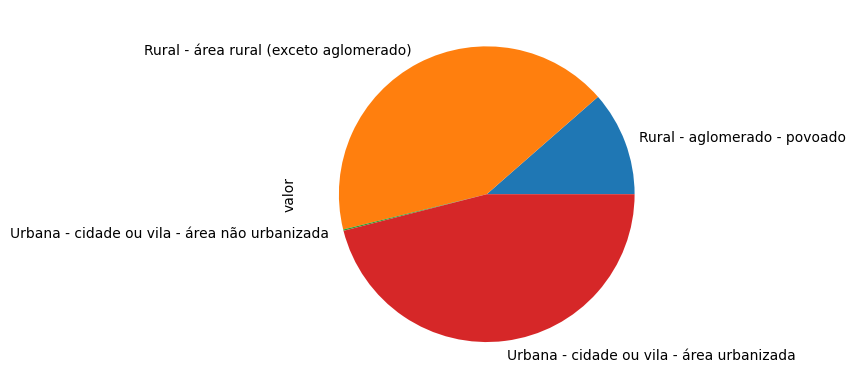

In [10]:
# agora, vamos ver esses valores no gráfico
selecionados.plot(kind='pie')

---

In [11]:
# resetando as configurações de exibição das tabelas
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.float_format')
# pd.reset_option('display.max_colwidth')